<a href="https://colab.research.google.com/github/Gursharan-Reddy/CODTECH/blob/main/Tak3_CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow nltk matplotlib pillow scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469550 sha256=1dc2951eda08f66b75a1120548c00d72ec2ebed40374440cb2d41026f889a67c
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9084 - loss: 0.3029
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9846 - loss: 0.0496
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9900 - loss: 0.0305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


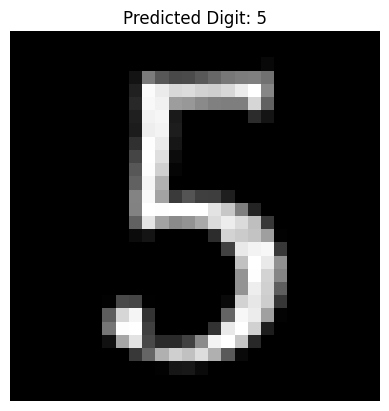

✅ Predicted Digit: 5


In [ ]:
# ✅ STEP 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# ✅ STEP 2: Load and Preprocess MNIST Dataset
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train)

# ✅ STEP 3: Define and Train a Simple CNN Model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

# ✅ STEP 4: Provide the Path to the Image (manually)
img_path = "/content/images.png"  # Replace with your image path

# ✅ STEP 5: Preprocess the Image
if not os.path.exists(img_path):
    raise FileNotFoundError(f"File not found: {img_path}")

img = Image.open(img_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))               # Resize to MNIST format
img_array = np.array(img)

# Invert colors if background is white
if np.mean(img_array) > 127:
    img_array = 255 - img_array

img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# ✅ STEP 6: Predict the Digit
prediction = model.predict(img_array)
digit = np.argmax(prediction)

# ✅ STEP 7: Display the Result
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {digit}")
plt.axis('off')
plt.show()

print(f"✅ Predicted Digit: {digit}")
